# **SyriaTel Customer Churn: Phase 3 Project**

### By: Dean Muimi Mutie

## **Business understanding**
### Business Problem 
SyriaTel, a telecommunication company is losing revenue because some of their customers stop using its services. Replacing these customers is more expensive than keeping the existing ones. The company has the customer data on services used, billing details, account history and demographics but is not using this information to predict churn. A binary classification model that predicts whether a customer is likely to leave SyriaTel soon is therefore needed so that retention actions can be taken early on high-risk customers and protect revenue

### Objectives
* To build a binary classification model that accurately predicts whether a SyriaTel customer will churn using usage patterns, service plans and customer service interaction data
* To identify key factors that are strongly associated with customer churn
* To compare multiple binary classification models and identify patterns and select the most effective approach for churn
* To measure how well the model generalizes to unseen data to ensure reliability
* To support data-driven decision making aimed at reducing customer loss and improve revenue

## **Data Understanding**
The datasets used in this analyisis were sourced from Kaggle https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset 

##  **Data Preparation**
In this section I performed some basic data inspection to check the datasets. 

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

#Class Imbalance Handling 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import pipeline as ImbPipeline

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Train test
from sklearn.model_selection import(train_test_split, GridSearchCV, cross_validate, cross_val_score, StratifiedKFold)
from sklearn.metrics import(accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, roc_auc_score, roc_curve, classification_report)

In [703]:
# Read the dataframe
churn_df = pd.read_csv('SyriaTel_Customer_Churn.csv')
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data inspection

In [704]:
print(churn_df.shape)
print(churn_df.info())

(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 

In [705]:
churn_df.duplicated().sum()

np.int64(0)

#### As interpreted above, the dataset has 21 Feature and 3333 entries with no duplicates or missing values

In [706]:
# Generate a naming for the columns
column_names = churn_df.columns
new_column_names = []

for item in column_names:
    new_column_names.append(item.replace(' ','_'))
    
churn_df.columns = new_column_names
churn_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [707]:
churn_df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [708]:
# Numerical columns (names)
numerical_columns = churn_df.select_dtypes(include='number').columns
print("Numerical columns:", list(numerical_columns))
print("Number of numerical columns:", len(numerical_columns))

# Categorical columns (names)
categorical_columns = churn_df.select_dtypes(exclude='number').columns
print("Categorical columns:", list(categorical_columns))
print("Number of categorical columns:", len(categorical_columns))

Numerical columns: ['account_length', 'area_code', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']
Number of numerical columns: 16
Categorical columns: ['state', 'phone_number', 'international_plan', 'voice_mail_plan', 'churn']
Number of categorical columns: 5


In [709]:
churn_df.drop(['phone_number'],axis=1,inplace=True)

## Explanatory Data Analysis
#### For better understanding of the data, we look at the several relationship between different variables  relating to the target variable customer churn

##### 1. Churn Distribution

churn
False    2850
True      483
Name: count, dtype: int64


Text(0.5, 1.0, 'Churn Distribution')

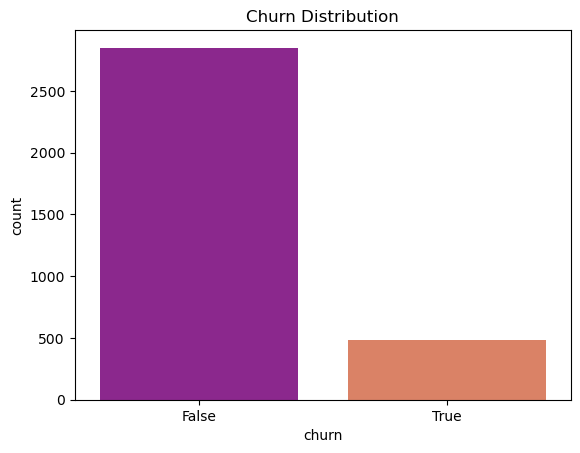

In [710]:
print(churn_df.churn.value_counts())
sns.countplot(data=churn_df, x='churn', palette='plasma')
plt.title('Churn Distribution')

##### Out of the 3333 customers, 483 turn to be false as they have terminated their contract with SyriaTel. The distribution shows a class imbalance and needs to be addressed before modeling so as the model doesn't make false predictions.

#### 2. Distribution of customers by Area Code

In [711]:
area = churn_df['area_code'].value_counts()
transuction = area.index
quantity = area.values
figure = px.pie(churn_df, 
                values= quantity, 
                names= transuction, 
                hole = .5, 
                title= 'Distribution of customers by Area Code')
figure.show()

##### 49.7% of customers originate from the area code 415 25.2% from 510 and 25.1% from area code 408

#### 3. Customer churn in relation to customer service calls

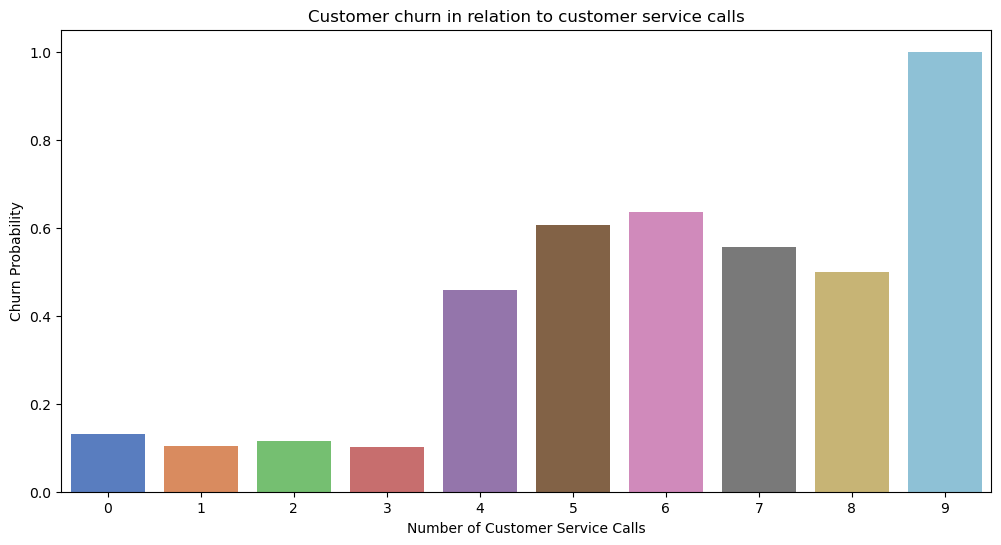

In [712]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=churn_df,
    x='customer_service_calls',
    y='churn',
    errorbar=None,
    palette='muted'
)

plt.title('Customer churn in relation to customer service calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Probability')

plt.show()

#### As seen, as the number of customer  service calls increases, the higher the chance of customer's churn.

#### 4.Correlation heatmap for Numeric features

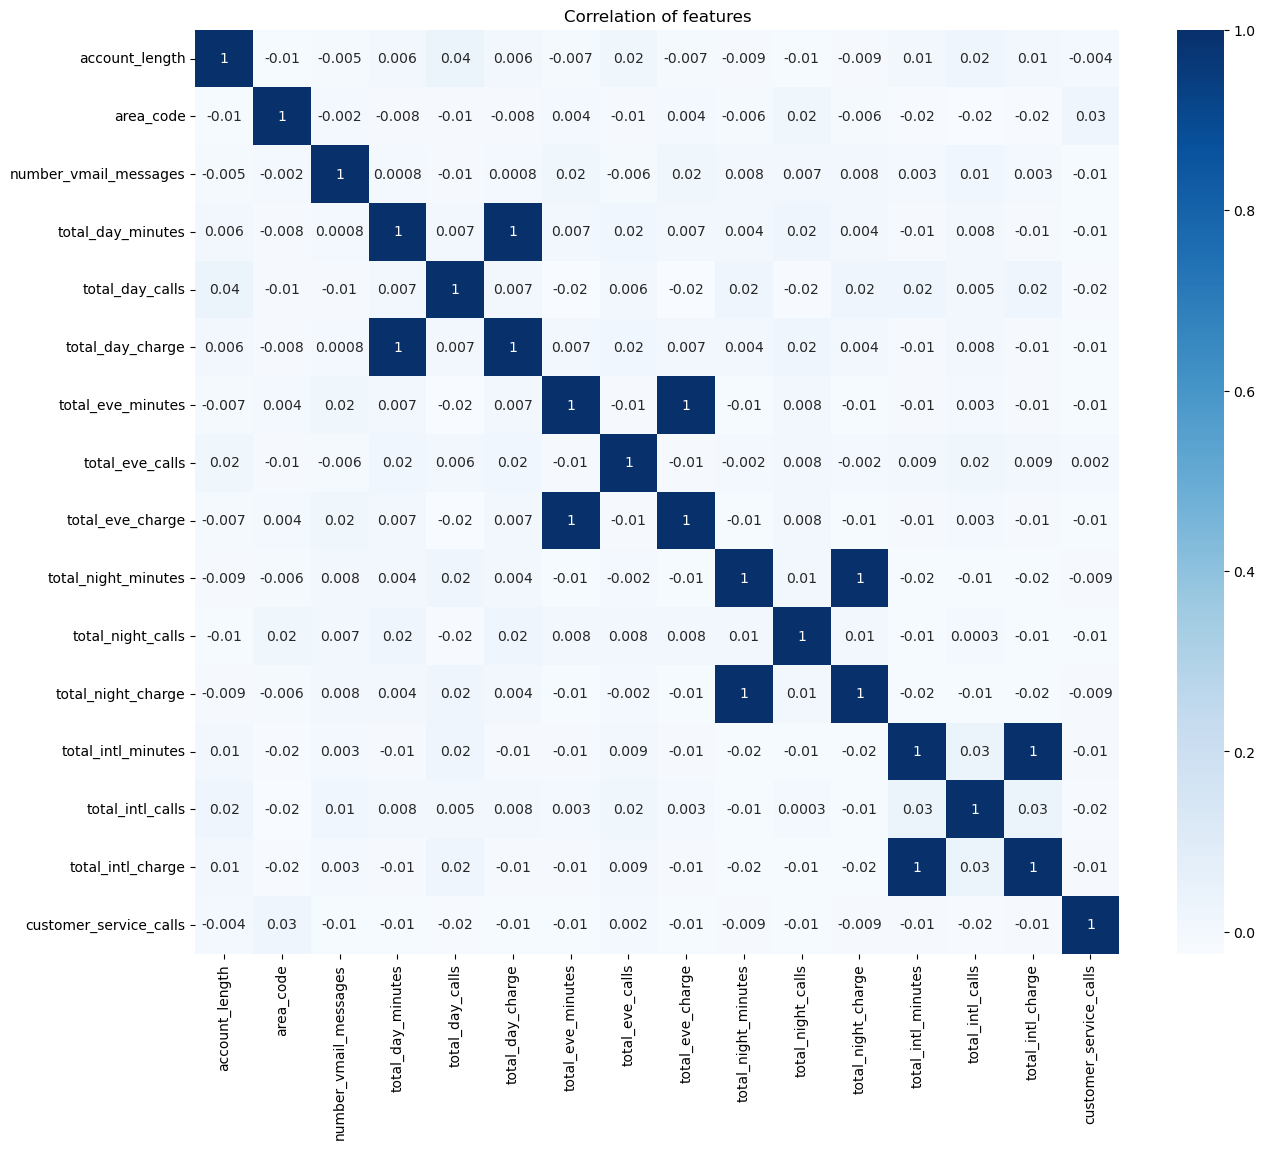

In [754]:
corr_mat = churn_df[numerical_columns].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.title('Correlation of features')
plt.xticks(rotation=90);
plt.yticks(rotation=0);

##### Most of the features are not correlated however some do share a perfect correlation of 1 indicates. 

### Preprocessing pipeline 
#### Feature Engineering

In [ ]:
churn_df['total_minutes'] = (churn_df['total_day_minutes'] + churn_df['total_eve_minutes'] + churn_df['total_night_minutes'] + churn_df['total_intl_minutes'])
churn_df['total_charges'] = (churn_df['total_day_charge'] + churn_df['total_eve_charge'] + churn_df['total_night_charge'] + churn_df['total_intl_charge'])
churn_df['total_calls'] = (churn_df['total_day_calls'] + churn_df['total_eve_calls'] + churn_df['total_night_calls'] + churn_df['total_intl_calls'])


In [715]:
drop_cols = ['total_day_calls','total_eve_calls','total_night_calls','total_intl_calls','total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge', 'area_code','state']
clean_churn_df = churn_df.drop(columns=drop_cols)
clean_churn_df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,customer_service_calls,churn,total_minutes,total_charges,total_calls
0,128,no,yes,25,1,False,717.2,75.56,303
1,107,no,yes,26,1,False,625.2,59.24,332
2,137,no,no,0,0,False,539.4,62.29,333
3,84,yes,no,0,2,False,564.8,66.80,255
4,75,yes,no,0,3,False,512.0,52.09,359
...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,2,False,660.7,60.10,292
3329,68,no,no,0,3,False,585.4,63.53,239
3330,28,no,no,0,2,False,675.6,67.74,264
3331,184,yes,no,0,2,False,517.6,57.53,336


### Preprocessing Pipline
#### Define Target(y) and Predictor(X)


In [716]:
y = clean_churn_df['churn']
X = clean_churn_df.drop(columns=['churn'])

#### Feature groups

In [717]:
categorical_features = ['international_plan', 'voice_mail_plan']
numerical_features = ['account_length', 'number_vmail_messages', 'customer_service_calls', 'total_minutes', 'total_charges', 'total_calls'] 

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

## **Modeling**
### 1. Logistic Regression Model

In [718]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Wrap into a full pipeline for scaling and modeling
log_reg_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
    ])
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'number_vmail_messages',
                                                   'customer_service_calls',
                                                   'total_minutes',
                                                   'total_charges',
                                                   'total_calls']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['international_plan',
                                                   'voice_mail_plan'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [719]:
# Fit preprocessing only on training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

# Apply the same transformations to the test data
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(
    X_train_processed,
    y_train
)

In [720]:
# Train logistic regression on balanced data
log_reg_smote = LogisticRegression(random_state=42)
log_reg_smote.fit(X_train_balanced, y_train_balanced)

LogisticRegression(random_state=42)

### Logistic Model Evaluation

In [721]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    Evaluate a sklearn pipeline or model
    """
    # Predictions
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    # ROC-AUC
    roc_auc = None
    if hasattr(model, 'predict_proba'):
        y_test_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_proba)

    print(f"{model_name} Performance")    
    
    print("\nRecall Score")
    print(f"Train: {recall_score(y_train, y_train_preds):.4f}")
    print(f"Test : {recall_score(y_test, y_test_preds):.4f}")

    print("\nPrecision Score")
    print(f"Train: {precision_score(y_train, y_train_preds):.4f}")
    print(f"Test : {precision_score(y_test, y_test_preds):.4f}")

    print("\nAccuracy Score")
    print(f"Train: {accuracy_score(y_train, y_train_preds):.4f}")
    print(f"Test : {accuracy_score(y_test, y_test_preds):.4f}")
    
    print("\nF1 Score")
    print(f"Train: {f1_score(y_train, y_train_preds):.4f}")
    print(f"Test : {f1_score(y_test, y_test_preds):.4f}")
    
    if roc_auc is not None:
        print(f"\nROC-AUC Score (Test): {roc_auc:.4f}")
        
    print("\nClassification Report (Test Set)")    
    print(classification_report(y_test, y_test_preds, target_names=["Not Churn", "Churn"]))

    cm = confusion_matrix(y_test, y_test_preds)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Not Churn", "Churn"]
    )
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()
    
    return {
        'train_recall': recall_score(y_train, y_train_preds),
        'test_recall': recall_score(y_test, y_test_preds),
        'train_precision': precision_score(y_train, y_train_preds),
        'test_precision': precision_score(y_test, y_test_preds),
        'train_accuracy': accuracy_score(y_train, y_train_preds),
        'test_accuracy': accuracy_score(y_test, y_test_preds),
        'train_f1': f1_score(y_train, y_train_preds),
        'test_f1': f1_score(y_test, y_test_preds),
        'test_roc_auc': roc_auc
    }


Model Performance

Recall Score
Train: 0.7694
Test : 0.7526

Precision Score
Train: 0.3676
Test : 0.3561

Accuracy Score
Train: 0.7749
Test : 0.7661

F1 Score
Train: 0.4975
Test : 0.4834

ROC-AUC Score (Test): 0.8190

Classification Report (Test Set)
              precision    recall  f1-score   support

   Not Churn       0.95      0.77      0.85       570
       Churn       0.36      0.75      0.48        97

    accuracy                           0.77       667
   macro avg       0.65      0.76      0.67       667
weighted avg       0.86      0.77      0.80       667



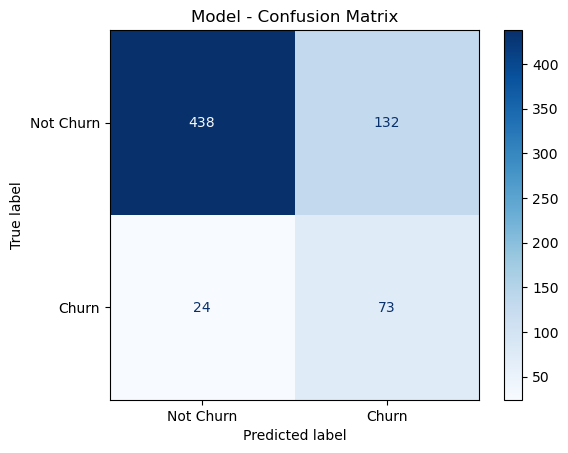

{'train_recall': 0.7694300518134715,
 'test_recall': 0.7525773195876289,
 'train_precision': 0.36757425742574257,
 'test_precision': 0.35609756097560974,
 'train_accuracy': 0.7749437359339835,
 'test_accuracy': 0.7661169415292354,
 'train_f1': 0.49748743718592964,
 'test_f1': 0.48344370860927155,
 'test_roc_auc': np.float64(0.8190269488153373)}

In [722]:
log_reg_pipeline.fit(X_train, y_train)
evaluate_model(log_reg_pipeline, X_train, X_test, y_train, y_test)


The logistic regression model achieved reasonable recall on the churn class, indicating its ability to correctly identify customers likely to churn. The use of class balancing improved detection of minority churn cases, although some false positives were observed. Overall, the model provides a reliable baseline for churn prediction.

### 2.Decision Tree Model

Decision Tree (Baseline) Performance

Recall Score
Train: 1.0000
Test : 0.6701

Precision Score
Train: 1.0000
Test : 0.6250

Accuracy Score
Train: 1.0000
Test : 0.8936

F1 Score
Train: 1.0000
Test : 0.6468

ROC-AUC Score (Test): 0.8008

Classification Report (Test Set)
              precision    recall  f1-score   support

   Not Churn       0.94      0.93      0.94       570
       Churn       0.62      0.67      0.65        97

    accuracy                           0.89       667
   macro avg       0.78      0.80      0.79       667
weighted avg       0.90      0.89      0.90       667



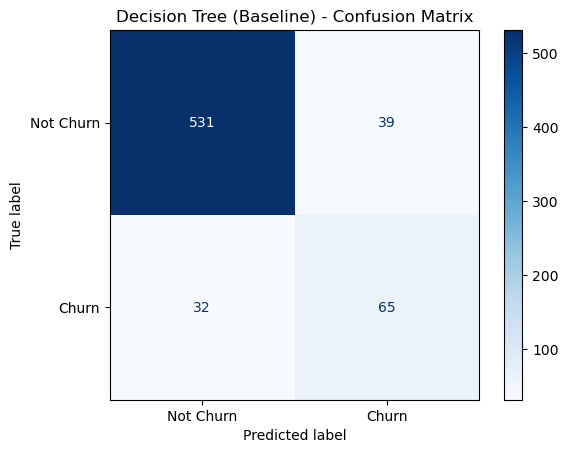

In [723]:
dt_baseline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Train model
dt_baseline.fit(X_train, y_train)

# Evaluate model
dt_baseline_results = evaluate_model(model=dt_baseline,
                                     X_train=X_train,
                                     X_test=X_test,
                                     y_train=y_train,
                                     y_test=y_test,
                                     model_name="Decision Tree (Baseline)")


The baseline Decision Tree model performs well on historical data but shows weaker generalization on new data. While it achieves 89% overall accuracy on the test set, its ability to correctly identify churners is moderate (67% recall, 62% precision). The ROC-AUC of 0.80 indicates acceptable but not strong discrimination between churn and non-churn customers. Overall, this model provides a reasonable benchmark but is less reliable for churn detection compared to more advanced models and may miss a significant portion of at-r sk customers.

### 3. Hyperparameter tuning

In [756]:
# Define the pipeline (same preprocessor as baseline DT)
dt_tuned_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Decision Tree Parameters:
{'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 20}
Decision Tree (Tuned) Performance

Recall Score
Train: 0.7798
Test : 0.6289

Precision Score
Train: 0.9319
Test : 0.8714

Accuracy Score
Train: 0.9599
Test : 0.9325

F1 Score
Train: 0.8491
Test : 0.7305

ROC-AUC Score (Test): 0.8421

Classification Report (Test Set)
              precision    recall  f1-score   support

   Not Churn       0.94      0.98      0.96       570
       Churn       0.87      0.63      0.73        97

    accuracy                           0.93       667
   macro avg       0.91      0.81      0.85       667
weighted avg       0.93      0.93      0.93       667



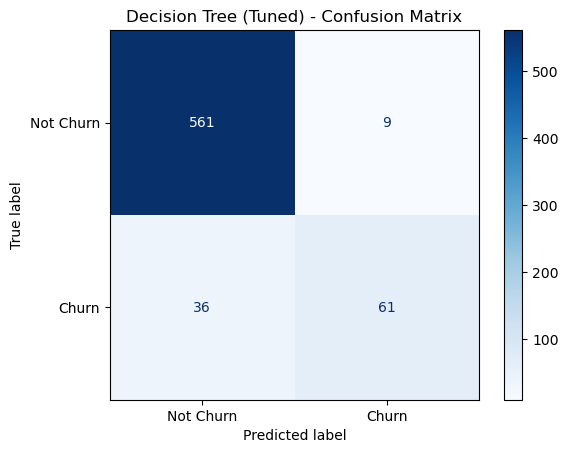

In [760]:
# Hyperparameter grid
dt_param_grid = {
    'model__max_depth': [None, 5, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10, 20],
    'model__min_samples_leaf': [1, 2, 5, 10],
    'model__criterion': ['gini', 'entropy']
}

# Grid Search with cross-validation
dt_grid_search = GridSearchCV(
    estimator=dt_baseline,
    param_grid=dt_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Train tuned model
dt_grid_search.fit(X_train, y_train)

# Best tuned model
dt_best_model = dt_grid_search.best_estimator_

print("Best Decision Tree Parameters:")
print(dt_grid_search.best_params_)


# Evaluate tuned Decision Tree
dt_tuned_results = evaluate_model(model=dt_best_model,
                                  X_train=X_train,
                                  X_test=X_test,
                                  y_train=y_train,
                                  y_test=y_test,
                                  model_name="Decision Tree (Tuned)")

### 4. Random Forest Model

In [755]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

In [725]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("random_forest", rf_model)
])


In [726]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['account_length',
                                                   'number_vmail_messages',
                                                   'customer_service_calls',
                                                   'total_minutes',
                                                   'total_charges',
                                                   'total_calls']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['international_plan',
                                                   'voice_mail_plan'])])),
                ('random_forest',
                 RandomForestClassifier(min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

Random Forest Performance

Recall Score
Train: 0.7073
Test : 0.5979

Precision Score
Train: 1.0000
Test : 0.9831

Accuracy Score
Train: 0.9576
Test : 0.9400

F1 Score
Train: 0.8285
Test : 0.7436

ROC-AUC Score (Test): 0.8998

Classification Report (Test Set)
              precision    recall  f1-score   support

   Not Churn       0.94      1.00      0.97       570
       Churn       0.98      0.60      0.74        97

    accuracy                           0.94       667
   macro avg       0.96      0.80      0.85       667
weighted avg       0.94      0.94      0.93       667



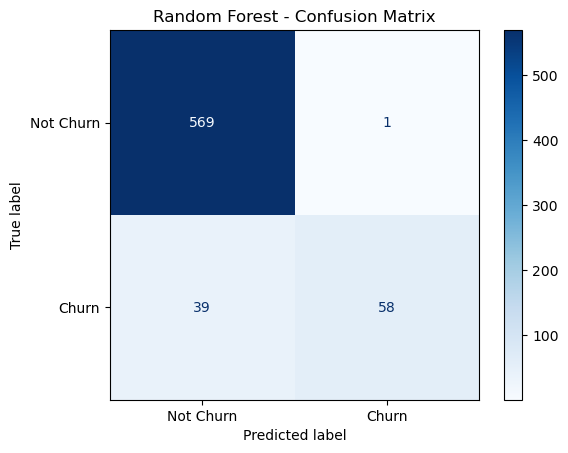

{'train_recall': 0.7072538860103627,
 'test_recall': 0.5979381443298969,
 'train_precision': 1.0,
 'test_precision': 0.9830508474576272,
 'train_accuracy': 0.9576144036009002,
 'test_accuracy': 0.9400299850074962,
 'train_f1': 0.8285280728376327,
 'test_f1': 0.7435897435897436,
 'test_roc_auc': np.float64(0.8998010490142883)}

In [ ]:
evaluate_model(
    rf_pipeline,
    X_train,
    X_test,
    y_train,
    y_test,
    model_name="Random Forest"
)


The Random Forest model performs well in predicting customer churn, with 94% overall accuracy and strong confidence when it flags a customer as likely to churn. This means marketing or retention efforts can be targeted efficiently with minimal wasted outreach. However, the model does not capture all churners, indicating an opportunity to further improve early churn detection. Overall, the model is reliable and effective for guiding churn prevention strategies.

## **Model Comparison and Selection**

In [762]:
models = [
    ("Logistic Regression", log_reg_pipeline),
    ("Decision Tree", dt_baseline),
    ("Tuned Decision Tree", dt_best_model),
    ("Random Forest", rf_pipeline)
]

results = []

for name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy (%)": accuracy * 100
    })

accuracy_df = pd.DataFrame(results)
accuracy_df


,Model,Accuracy (%)
0,Logistic Regression,76.611694
1,Decision Tree,89.355322
2,Tuned Decision Tree,93.253373
3,Random Forest,94.002999


In [729]:
def pred_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    report = classification_report(
        y_test,
        y_pred,
        output_dict=True
    )

    return {
        "Model": model_name,
        "Precision (Churn)": report["True"]["precision"],
        "Recall (Churn)": report["True"]["recall"],
        "F1 (Churn)": report["True"]["f1-score"],
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "Support (Churn)": report["True"]["support"]
    }

In [730]:
rows = []

rows.append(pred_metrics(
    log_reg_pipeline,
    X_test,
    y_test,
    "Logistic Regression"
))

rows.append(pred_metrics(
    dt_pipeline,
    X_test,
    y_test,
    "Decision Tree"
))

rows.append(pred_metrics(
    rf_pipeline,
    X_test,
    y_test,
    "Random Forest"
))

metrics_df = pd.DataFrame(rows).set_index("Model")
metrics_df


,Precision (Churn),Recall (Churn),F1 (Churn),ROC-AUC,Support (Churn)
Model,,,,,
Logistic Regression,0.356098,0.752577,0.483444,0.819027,97.0
Decision Tree,0.663717,0.773196,0.714286,0.840812,97.0
Random Forest,0.983051,0.597938,0.743590,0.899801,97.0


Based on the model comparison results, a few clear conclusions stand out.

Overall, the Random Forest model performs best. It achieves the highest ROC-AUC score, indicating the strongest ability to distinguish between churn and non-churn customers across different decision thresholds. Its precision for churn is also very high, meaning that when the model predicts a customer will churn, it is usually correct.

The Decision Tree model shows balanced performance. It has reasonably strong recall and F1-score, suggesting it can identify churners fairly well while maintaining a good trade off between precision and recall. However, its overall discriminatory power (ROC-AUC) is still lower than that of the Random Forest.

The Logistic Regression model performs the weakest among the three. Although it has relatively high recall meaning it captures many churn cases it suffers from low precision and a lower F1-score. This indicates that it produces more false positives, predicting churn for customers who do not actually leave.

## ROC curve Curve Plot

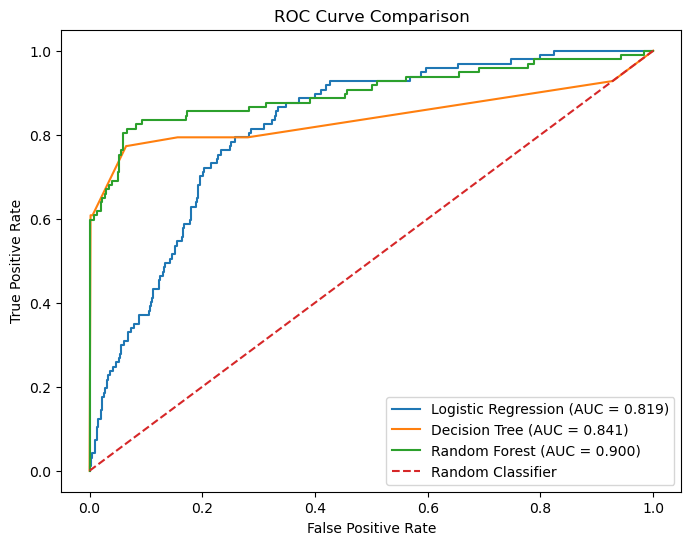

In [740]:
# Predicted probabilities
log_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]
dt_prob  = dt_pipeline.predict_proba(X_test)[:, 1]
rf_prob  = rf_pipeline.predict_proba(X_test)[:, 1]

# ROC curve data
log_fpr, log_tpr, _ = roc_curve(y_test, log_prob)
dt_fpr, dt_tpr, _   = roc_curve(y_test, dt_prob)
rf_fpr, rf_tpr, _   = roc_curve(y_test, rf_prob)

# AUC scores
log_auc = roc_auc_score(y_test, log_prob)
dt_auc  = roc_auc_score(y_test, dt_prob)
rf_auc  = roc_auc_score(y_test, rf_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression (AUC = {log_auc:.3f})")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.3f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})")

# Random baseline
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


#### The ROC curve plots the true positive rate against the false positive rate for the classifier. Models that perform best produce curves that closely follow the upper-left corner of the graph; in this case, the random forest classifier demonstrates the strongest performance

## Conclusion

This analysis demonstrates that predictive analytics can serve as a powerful decision-support tool for understanding and managing customer churn at SyriaTel. By leveraging historical customer data and applying multiple machine learning techniques, the study successfully identified key behavioral and service-related factors that influence customer attrition.

Among the evaluated models, the Random Forest classifier consistently delivered the strongest performance, achieving superior discrimination between customers likely to churn and those likely to remain. Its effectiveness indicates that churn at SyriaTel is driven by complex, interrelated factors rather than isolated variables, underscoring the limitations of purely linear or rule-based approaches.

The analysis further reveals that customer service experience, pricing exposure, and usage intensity are central drivers of churn. High volumes of customer service interactions and elevated usage charges emerge as early warning signals of dissatisfaction, while subscription to international plans represents a distinct risk segment. Importantly, the study highlights the need to evaluate churn models using appropriate performance metrics, as traditional accuracy measures alone can obscure risk within imbalanced customer populations.

Collectively, these findings confirm that SyriaTel possesses both the data maturity and analytical foundation required to shift from reactive churn management to a proactive, predictive retention strategy.

## Recommendations

1. Adopt a Predictive Churn Model
Implement the Random Forest–based binary classification model as the primary tool for predicting customer churn, leveraging usage patterns, service plans, and customer service interaction data.

2. Use Data-Driven Early Warning Indicators
Actively monitor key churn drivers—customer service call frequency, international plan subscription, usage intensity, and charges—as leading indicators of customer attrition.

3. Standardize Model Performance Evaluation
Evaluate and compare churn models using ROC-AUC, recall, and precision to ensure accurate identification of high-risk customers, rather than relying solely on overall accuracy.

4. Ensure Model Reliability and Generalization
Maintain rigorous validation practices, including testing on unseen data and periodic performance reviews, to confirm consistent and reliable predictions as customer behavior evolves.

5. Embed Predictive Insights into Business Decisions
Integrate churn risk scores into CRM and retention workflows to enable targeted, timely interventions for high-risk customers.

6. Optimize Retention Spend and Revenue Protection
Focus retention resources on customers with the highest predicted churn risk and revenue impact, improving cost efficiency and protecting recurring revenue.

7. Establish Continuous Improvement of Predictive Models
Regularly retrain and refine the model using new data to sustain predictive accuracy and ensure long-term strategic value.